In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
#ml
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import ipywidgets
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.gridspec as gridspec

# Purpose
The purpose of this notebook is to analyze soccer data - more specifically premier league data that gives basic insight into match stats throughout multiple seasons. 

The idea behind utilizing this dataset for the purpose of argument was trying to find trends in the data that could tell stories about teams in the league as well as predict how future teams could perform based on those stories. 


# Argument

Through the exploration of this dataset, the goal was to prove that there is “hidden” data that can predict to some degree of accuracy how many matches a soccer team will win. For example, it is obvious to some degree that the more goals you score, the more games you are likely to win. The more interesting question however is: what other statistic has a close relationship to winning more games in a season? The answer to this question can then direct analysts to advise soccer teams to focus on other areas other than the number of goals scored. For this project specifically with the scope and timeline given, the focus was fixated on if the number of matches won in a season can be predicted to some degree of accuracy based on the number of passes completed throughout the season. While the ultimate goal is to get a comprehensive group of statistics and prediction models in order to get a clearer picture and more accurate prediction, there should be interesting discoveries focusing on just passes completed. 

# The Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Kodiris-Dev/HelloWorld/main/stats.csv')
df=df[['wins', 'goals', 'total_pass', 'season', 'team']]
df['season'] = pd.Categorical(df['season'])
df['season_code'] = df['season'].cat.codes
df

,wins,goals,total_pass,season,team,season_code
0,28.0,83.0,18723.0,2006-2007,Manchester United,0
1,24.0,64.0,16759.0,2006-2007,Chelsea,0
2,20.0,57.0,17154.0,2006-2007,Liverpool,0
3,19.0,63.0,18458.0,2006-2007,Arsenal,0
4,17.0,57.0,14914.0,2006-2007,Tottenham Hotspur,0
...,...,...,...,...,...,...
235,9.0,28.0,14960.0,2017-2018,Huddersfield Town,11
236,8.0,28.0,15721.0,2017-2018,Swansea City,11
237,7.0,37.0,17174.0,2017-2018,Southampton,11
238,7.0,35.0,12892.0,2017-2018,Stoke City,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   wins         240 non-null    float64 
 1   goals        240 non-null    float64 
 2   total_pass   240 non-null    float64 
 3   season       240 non-null    category
 4   team         240 non-null    object  
 5   season_code  240 non-null    int8    
dtypes: category(1), float64(3), int8(1), object(1)
memory usage: 8.5+ KB


## Dataset Breakdown

The dataset is broken up into subsets based on the season the matches were played in. Data from matches from seasons 2006-2017 are recorded with details ranging from goals scored, matches won to red cards obtained and possession. 

Breakdown of dataset:

Team - Premier League Team Name

Wins - Total wins in the season	

Losses - Total losses in the season

Goals - Total number of goals scored in the season

Total_yel_card- Total yellow cards received per team in the season

total_red_card	 - Total red cards received per team in the season

Total_scoring_att - Total scoring attacks/opportunities

Ontarget_scoring_att - On target (inside the goal frame) scoring attacks/opportunities

Hit_woodwork - Number of times ball hit the post/crossbar

Att_hd_goal - Number of header goals

Att_pen_goal - Number of penalty goals

Att_freekick_goal - Number of freekick goals

Att_ibox_goal - Number of goals inside the box

Att_obox_goal - Number of goals outside the box

Goal_fastbreak - Number of goals from a quick counter attack

Total_offside - Total number of offsides

Clean_sheet - Total number of clean sheets (not scored against)	

Goals_conceded - Total number of goals conceded (scored against)

Saves - Total number of goalkeeper saves

Outfielder_block - Number of blocks made by a non goalkeeper

Interception - number of interceptions (stealing possession)

Total_tackle - total number of tackles made in a season

Last_man_tackle - number of tackles by a player last in defense

Total_clearance - number of clearances

Head_clearance - number of clearances with the head	

Own_goals - number of own goals

Penalty_conceded - number of penalties conceded	

pen_goals_conceded	- number of penalties conceded that resulted in a goal

Total_pass - total number of passes

Total_through_ball - number of through balls

Total_long_balls - number of long balls thrown

Backward_pass - number of backward passes made

Total_cross - total number of crosses attempted

Corner_taken - number of corners taken

Touches - total number of times players in the team touched the ball

Big_chance_missed - number of clear goal scoring opportunities missed

Clearance_off_line - number of clearances when the ball is about to cross the goal line

Dispossessed - number of dispossessions

Penalty_save - number of penalties saved by goalkeeper

Total_high_claim - number of high catches made by goalkeeper

Punches - number of punches made by goalkeeper

Season - the season of the statistic row by year 


# Predict wins from goals
### SPLIT TRAINING AND TESTING DATA SET
12 total seasons
20 entries per season
80/20 split = 10/2 *season* = 200/40 entries

## Determine Relationship

As stated previously, in order to explore the dataset in support of finding additional statistics that can predict number of matches won in a season, a baseline must be established. The most obvious choice was comparing goals and wins to see what kind of relationship the data supports. To start, plotting a simple visualization between wins and goals will give a representation as to what kind of relationship exists.

---



In [4]:
final_data = df[['wins', 'goals']]

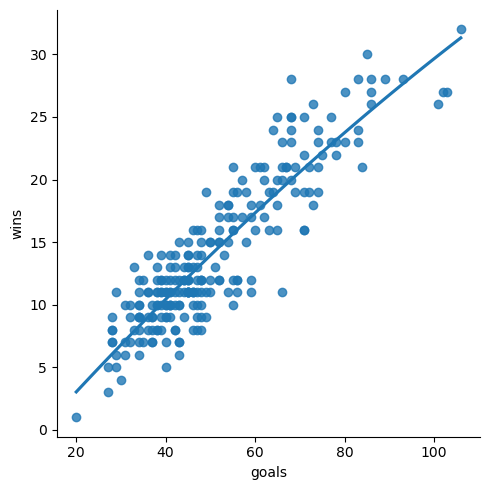

In [5]:
sns.lmplot(x ="goals", y ="wins", data = final_data, order = 2, ci = None)

As visible above, the relationship between goals and wins is relatively linear, suggesting that a linear regression prediction model would work in predicting one of the variables. This makes sense from a non technical point of view since the more goals a team scores in a match increases the likelihood of said team winning the match. However, this isn't a guarantee, since in some scenarios throughout the season as a whole, a team can score a lot of goals, but concede more goals than scored, resulting in more goals scored per match won than expected. This outcome turns the linear relationship slightly non-linear. For the scope of this project however, a linear regression is a decent start.

---

## Train and Test Linear Regression

In [6]:
X = np.array(final_data['goals']).reshape(-1, 1)
y = np.array(final_data['wins']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
final_data.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7588902284943725


C:\Users\ruiz_\AppData\Local\Temp\ipykernel_15992\2070977971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace = True)


Reading Output

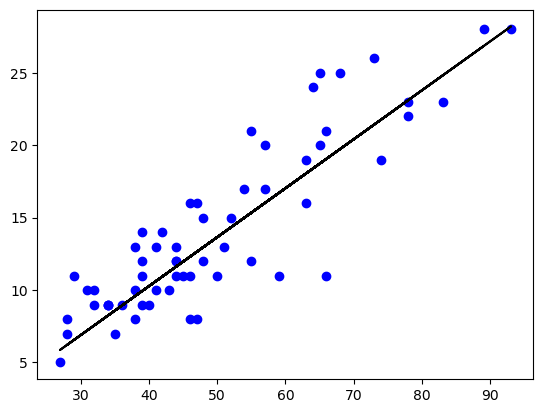

In [7]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [8]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.2312629991066375
MSE: 8.153260873335853
RMSE: 2.8553915446635076


## Predict Value

In [9]:
r_sq = regr.score(X_test, y_test)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', regr.intercept_)

# Print the Slope:
print('slope:', regr.coef_) 


coefficient of determination: 0.7588902284943725
intercept: [-3.26884512]
slope: [[0.33830138]]


### Interactive Graph

In the graph below, the output of the trained model can be seen. The input is number of goals, which can be controlled by the dropdown, while the predicted value is the number of matches won in a season. The model accuracy can be observed by seeing where the red dot (predicted value) lies in relation to the slope line.

In [10]:
@ipywidgets.interact(goals=list(range(20,101)))
def predict_wins(goals):
    X = np.array(final_data['goals']).reshape(-1, 1)
    y = np.array(final_data['wins']).reshape(-1, 1)

    # Separating the data into independent and dependent variables
    # Converting each dataframe into a numpy array 
    # since each dataframe contains only one column
    final_data.dropna(inplace = True)

    # Dropping any rows with Nan values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Splitting the data into training and testing data
    regr = LinearRegression()

    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
    # Predict a Response and print it:
    y_pred = regr.predict(np.array(goals).reshape((-1, 1)))
    print('Predicted wins:', y_pred, sep='\n')

    sns.lmplot(x ="goals", y ="wins", data = final_data, order = 2, ci = None, height=3, aspect=1.5)
    plt.scatter(x=goals, y=y_pred, color='r')
    return y_pred

interactive(children=(Dropdown(description='goals', options=(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3…

# Predict goals from passes
### SPLIT TRAINING AND TESTING DATA SET
12 total seasons
20 entries per season
80/20 split = 10/2 *season* = 200/40 entries

Once the baseline model of predicting matches won off of goals scored has been created, in order to determine if additional statistics can be used to predict matches won, a "linking" statistic has to be chosen from the dataset broken down earlier. Total passes seems to have some potential in uncovering useful information. In soccer, it is logical to assume that the more successful passes a team has, the higher the chance that a goal scoring opportunity is created. The interesting aspect that makes it interesting however is when considering a team that plays more of a counter attacking style. That is, when a team purposefully gives up "posession" of the ball (or choosing not to pass it around the field as much). A team that plays counter attcking soccer will have less total passes and tend to have less goals scored (often winning 1-0 or 2-1) due to the thin margins the style provides. This doesn't mean that a counter attacking team will have less matches won. History even shows that some counter attacking teams will have the most matches won depending on season to season. Knowing this, the relationship between total passes and goals will not be linear, so the process for determining the relationships, training and testing the model will be the same as predicting wins from goals.

In [11]:
final_data2 = df[['goals', 'total_pass']]

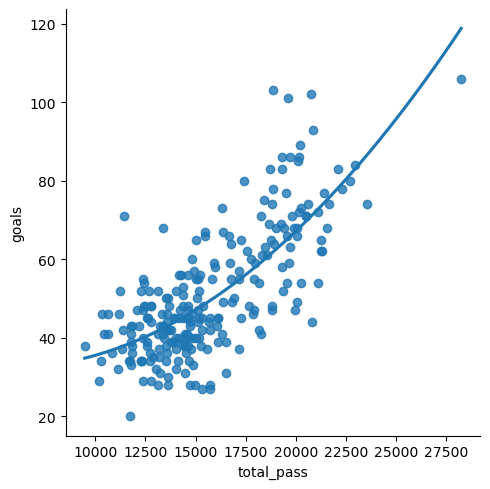

In [12]:
sns.lmplot(x ="total_pass", y ="goals", data = final_data2, order = 2, ci = None)

In [13]:
X = np.array(final_data2['total_pass']).reshape(-1, 1)
y = np.array(final_data2['goals']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
final_data2.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5035246553855772


C:\Users\ruiz_\AppData\Local\Temp\ipykernel_15992\3606074552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2.dropna(inplace = True)


Linear regression not a good fit

### Polynomial Regression

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
print(poly_reg_model.score(poly.fit_transform(X_test), y_test))

0.5269083677481139


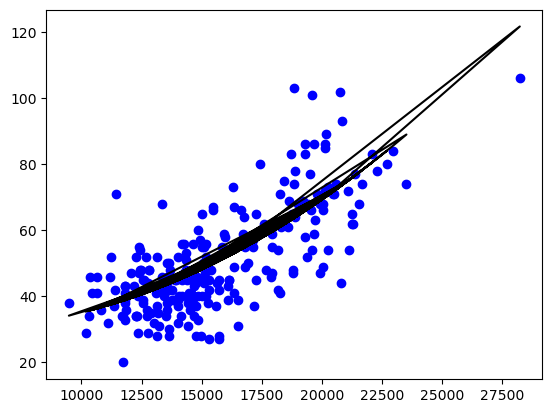

In [16]:
y_pred = poly_reg_model.predict(poly.fit_transform(X))
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
  
plt.show()

Polynomial regression not ideal

### Interactive Graph

In [17]:


@ipywidgets.interact(passes=ipywidgets.BoundedIntText(
    value=10000,
    min=8000,
    max=30000,
    step=1000,
    description='Passes:',
    disabled=False
))
def predict_goals(passes):
    # Predict a Response and print it:
    passes_data = poly.fit_transform(np.array([passes]).reshape((-1, 1)))
    y_pred = poly_reg_model.predict(passes_data)
    print('Predicted goals:', y_pred, sep='\n')

    fig = sns.lmplot(x ="total_pass", y ="goals", data = final_data2, order = 2, ci = None, height=3, aspect=1.5)
    fig = plt.scatter(x=passes, y=y_pred, color='r')
    return y_pred

interactive(children=(BoundedIntText(value=10000, description='Passes:', max=30000, min=8000, step=1000), Outp…

# Dashboard

**HOW TO USE**

The dashboard takes any number of total passes that a team in the premier league has completed in the entire season. The first graph will then update the number of goals that team is expected to score based on passes completed, and then interact with the second graph to predict the number of wins the team will end the season with. Both outputs will be printed to the screen.

To compare predicted outputs to real outputs, use the link below
https://www.premierleague.com/stats/top/clubs/wins?se=363

Pick a team in the 2020-2021 season (was not in testing or training dataset) and filter by passes completed to enter the value into the notebook. Then compare goals/wins that season to the predicted output.

In [18]:
#myLabel = ipywidgets.Label()
@ipywidgets.interact(passes=ipywidgets.BoundedIntText(
    value=10000,
    min=8000,
    max=28000,
    step=1000,
    description='Passes:',
    disabled=False
))
def dashboard(passes):
    goals = predict_goals(passes)
    wins = predict_wins(goals[0][0])
    print('Goals:', goals, 'Wins:', wins)

interactive(children=(BoundedIntText(value=10000, description='Passes:', max=28000, min=8000, step=1000), Outp…

The dashboard is a visual culmination of the models that predict both wins from goals as well as goals from total passes in a season. This method of visualization provides a link between total passes in a season and a predicted number of matches won in the same season. Entering 10000 passes with this iteration of the model outputs a prediction of 43.8 goals and 11.8 wins, indicating that a team in the premier league who only passes the ball 10000 times in a season would most likely end up at the bottom of the league with only 11 wins out of 34 games. 

# Evaluate Output for Observations
The first step in evaluation the models for the purpose of observation and making claims is to gather additional data not already included in the training and testing datasets. The premier league website has such additional data from the 2021/22 season not in the previous dataset, displayed below:

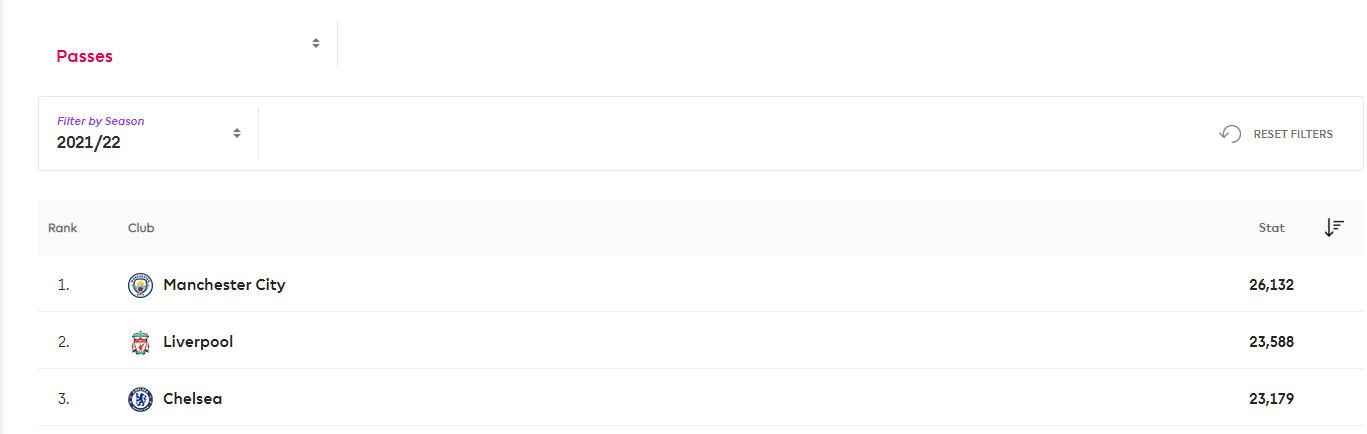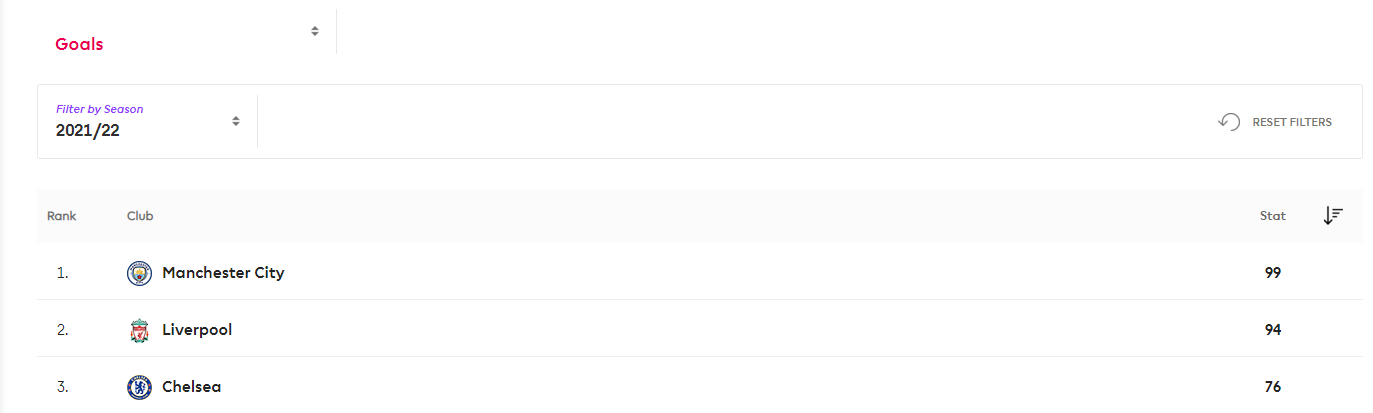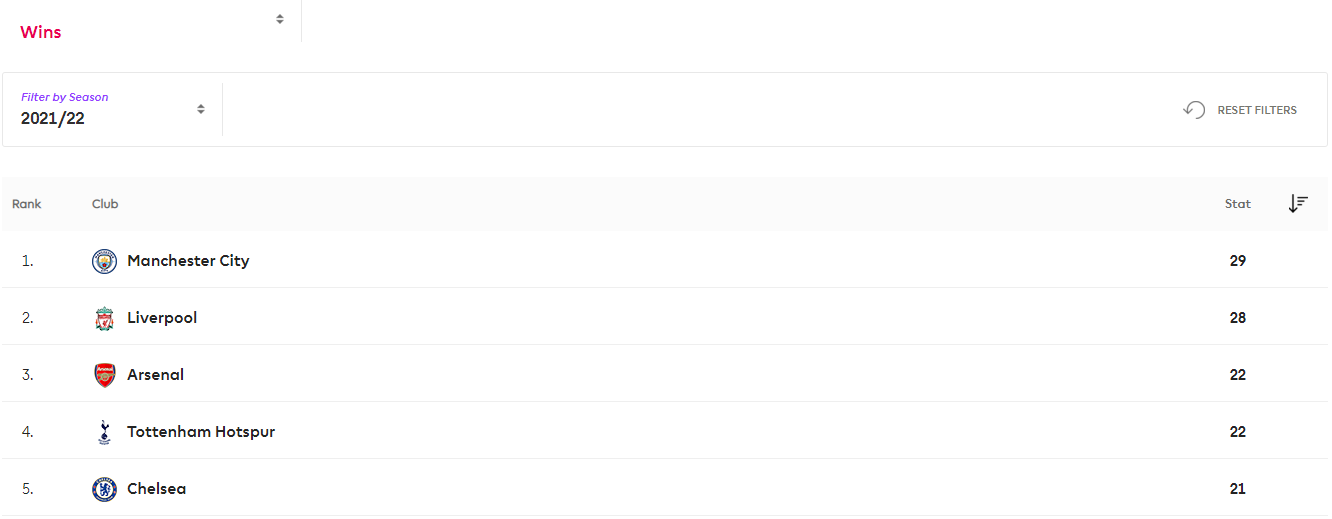

Already an interesting observation can be made, in that both in goals and total passes, Manchester City leads in first, followed by Liverpool and Chelsea, however in matches won, Chelsea drops to fifth, below Arsenal and Tottenham Hotspur. This confirms the earlier logic that a higher total pass count does not always indicate a higher win rate.

**Table Comparing 2021/22 Actual Statistics versus Model Output**
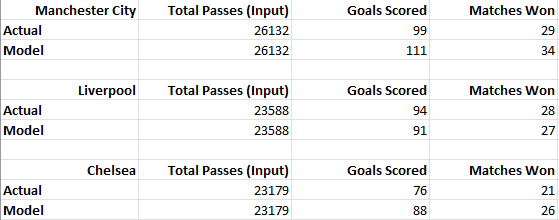

As visible in the table, the model has varying accuracy in its predictions. This can be due to a number of factors, one glaring one being the accuracy of the model that predicts goals scored from total passes. While the model is not accurate to a close degree, it does show a predictive relationship between total passes, goals scored and matches won. With a more accurate and custom model, the relationships between these three variables can be even more pronounced.

# Conclusion

Relating back to the argument, there does exist underlying statistics in soccer matches that can be used to predict the success of a soccer team throughout a season. These statistics can tell a story through the connective tissue between these numbers without the use of video footage. In the data explored within this notebook, a simple model was created to show that utilizing games in past seasons, there is a relationship between total passes and matches won, albeit not linear. While the polynomial regression was not incredibly accurate, it was able to predict matches won within 5 for three separate teams based on an input of total passes. 

While this is can be fascinating on its own, there is a larger impact on the game of soccer as a whole. Creating thorough and plentiful models on all statistics of the game can output a rankings list of statistics that can impact win/loss ratios the most. These statiistics can then direct soccer teams to invest resources in increasing total passes, tackles won, or even perhaps limiting fouls received (or increasing fouls given) in order to increase a teams win/loss percentage.

# Converting to altair + vegalite

In [19]:
import altair as alt
alt.Chart.from_dict?
myJekyllSaveDir = '/Users/ruiz_/OneDrive/Documents/GitHub/aruiz68.github.io/assets/json/'